# Plotting with Seaborn

This is mostly from their tutorial....however, there's more basics here (like setting axis limits and titles):

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the Iris dataset
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Pair plots

The fastest thing to do is a pair plot; essentially, just look at correlations between all variables, PLUS make histograms for each feature:

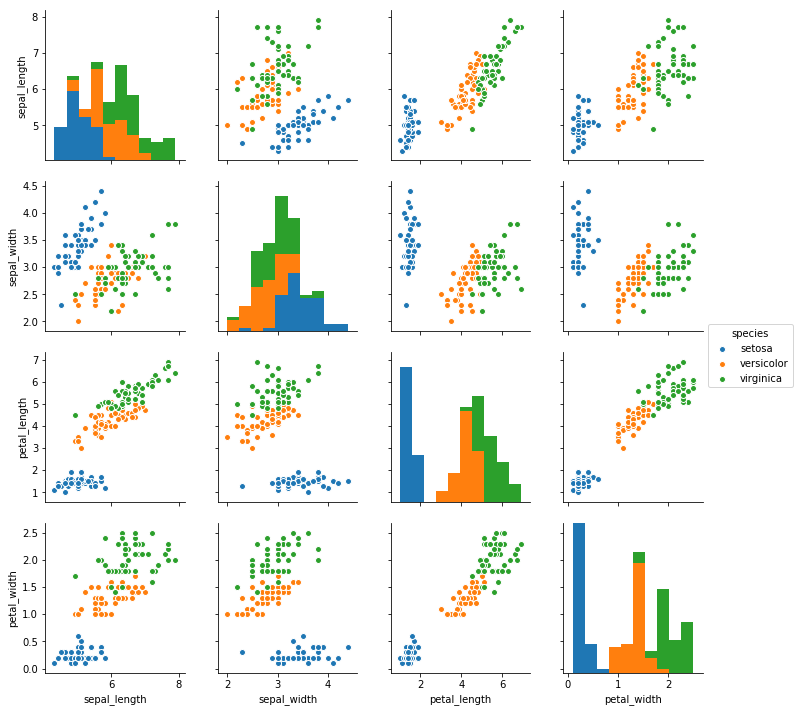

In [3]:
sns.pairplot(iris_df, hue='species')
plt.show()

To get multiple histograms, I think laying them on top of one another is fine:

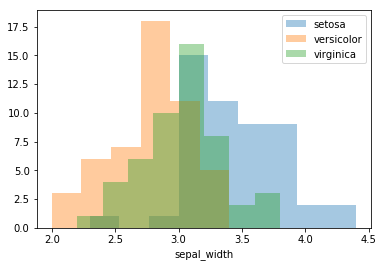

In [4]:
[sns.distplot(iris_df[iris_df.species == species].sepal_width, kde = False) for species in iris_df['species'].unique()]
plt.legend(iris_df['species'].unique())
plt.show()    

Even better would be an ECDF (empirical cumulative distribution function) plot; first, I'll need to create a function for it:

Then I'll use it to plot these data:

More options for pairplots: playing with keywords:

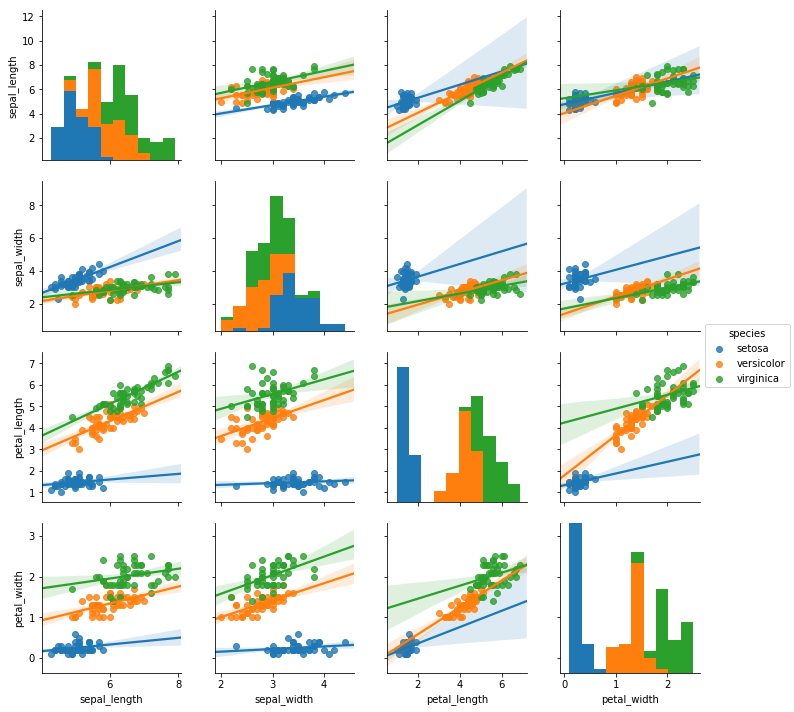

In [5]:
sns.pairplot(iris_df, kind="reg", hue = 'species')
plt.show()

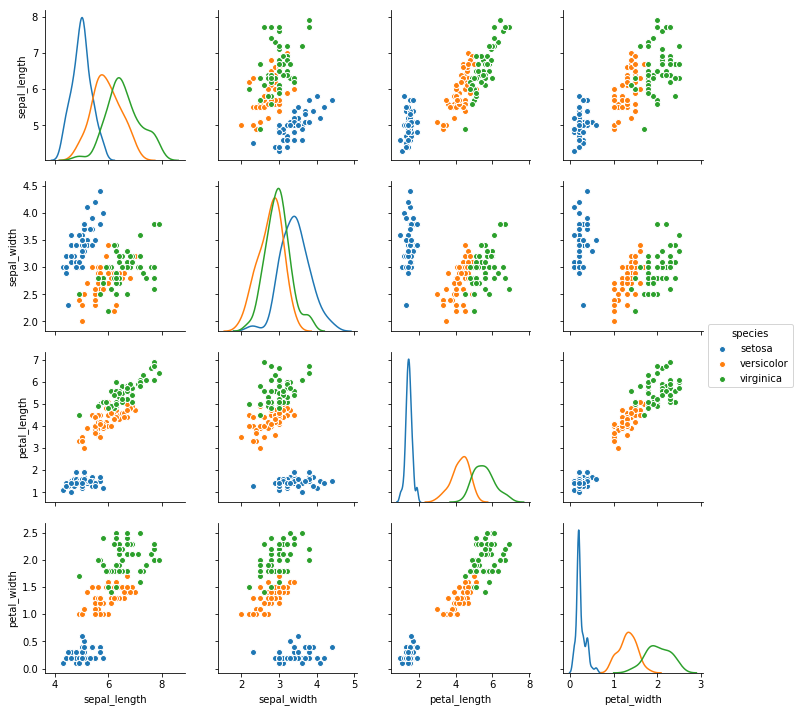

In [6]:
sns.pairplot(iris_df, diag_kind="kde", hue = 'species')
plt.show()

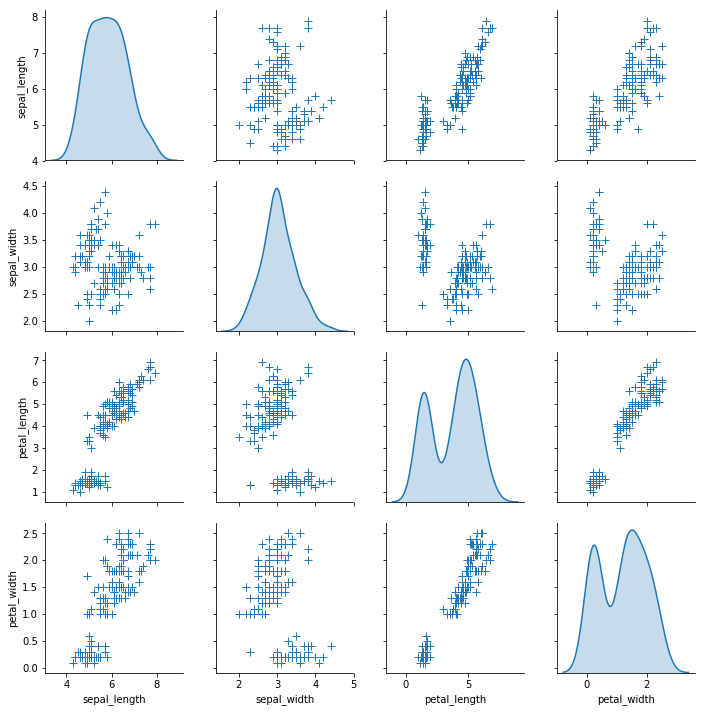

In [7]:
sns.pairplot(iris_df, diag_kind="kde", markers="+",
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.show()

Note that this also changed the marker size; different available markers include:

* 'D' - diamonds
* '+' - plus signs
* 'x' - x signs
* 'o' - circles
* '.' - points
* 's' - square

There's more and they're all Matplotlib...find them here:

https://matplotlib.org/api/markers_api.html

## Histograms

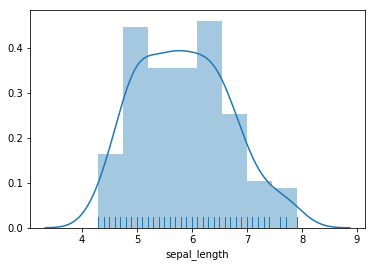

In [8]:
# Histogram of One feature
sns.distplot(iris_df.sepal_length, rug = True)
plt.show()

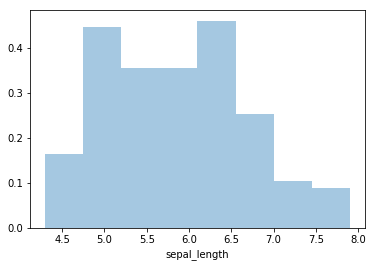

In [9]:
# Same thing, but take away the rug/kde and normalize
sns.distplot(iris_df.sepal_length, kde = False, norm_hist=True)
plt.show()


Making a CDF instead:

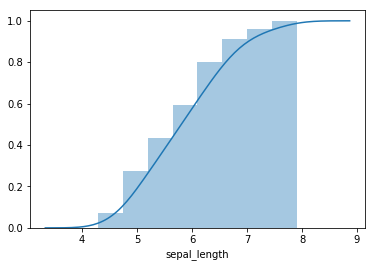

In [10]:
sns.distplot(iris_df.sepal_length, hist=True, 
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)
            )
plt.show()

### Facet grids

Put plots of the same type on different axes OR colors them. Helps with visualizing the same variables for different classes either with color or without resorting to color

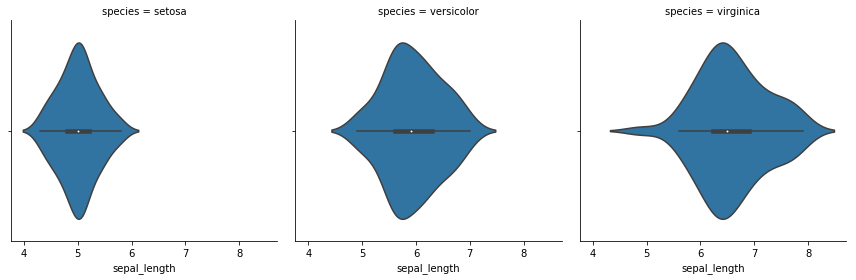

In [11]:
# Histograms for different classes
sns.factorplot(x = 'sepal_length', 
               data = iris_df, 
               col = 'species',
               kind = 'violin'
              )
plt.show()

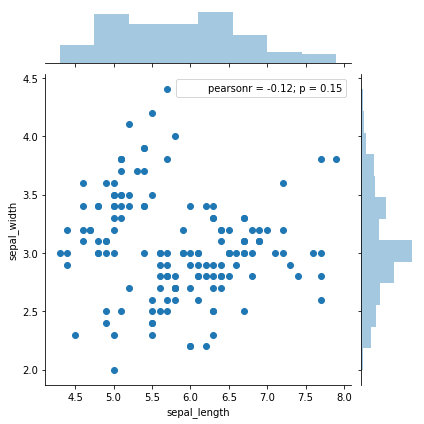

In [12]:
# 2-D Histograms with a scatter plot
sns.jointplot(x = "sepal_length", 
              y = "sepal_width",
              data = iris_df,
             )
plt.show()

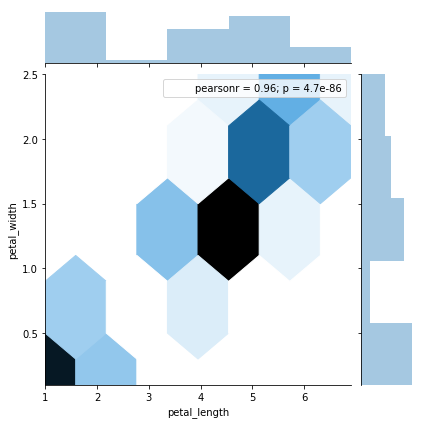

In [13]:
# 2-D Histograms with a hex plot
sns.jointplot(x = "petal_length", 
              y = "petal_width",
              data = iris_df,
              kind = 'hex'
             )
plt.show()

Histogram-esque for categorical group membership:

### Violin Plot:

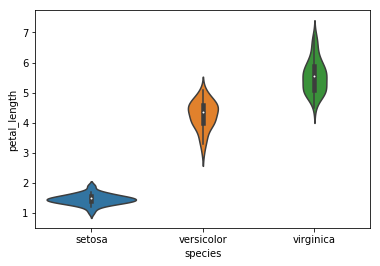

In [14]:
sns.violinplot(x = "species", 
               y = "petal_length",
               data = iris_df)
plt.show()

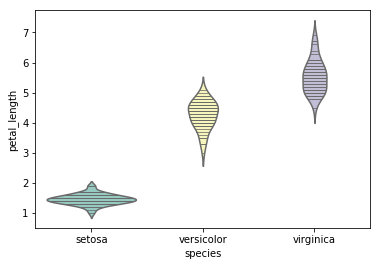

In [15]:
# Add sticks (like histogram rug) inside:
sns.violinplot(x = "species", 
               y = "petal_length",
               data = iris_df,
               inner = "stick",
               palette = "Set3")
plt.show()

### Swarm Plot:

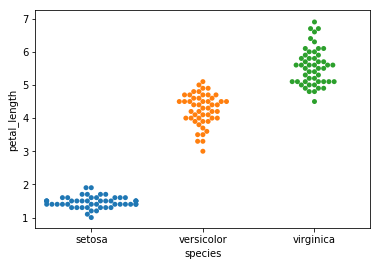

In [16]:
sns.swarmplot(x = "species", 
               y = "petal_length",
               data = iris_df)
plt.show()

Overlaying a violin plot with a swarm plot:

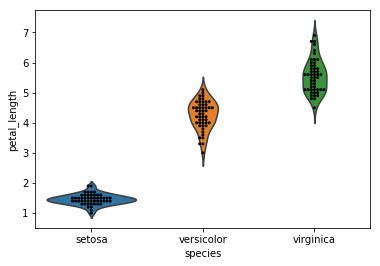

In [17]:
sns.violinplot(x = "species", 
               y = "petal_length",
               data = iris_df, inner = None)
sns.swarmplot(x = "species", 
              y = "petal_length",
              data = iris_df, 
              color = "k", size = 3)
plt.show()

### Box Plot:

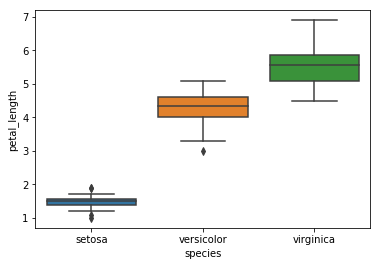

In [18]:
sns.boxplot(x = "species", 
               y = "petal_length",
               data = iris_df)
plt.show()

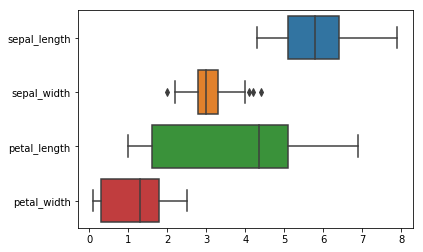

In [19]:
# Turn it sideways and plot everything!
sns.boxplot(data = iris_df.drop("species", axis = 1),
            orient = 'h')
plt.show()

Could also do this with sns.factorplot...it naturally lends itself to this task:

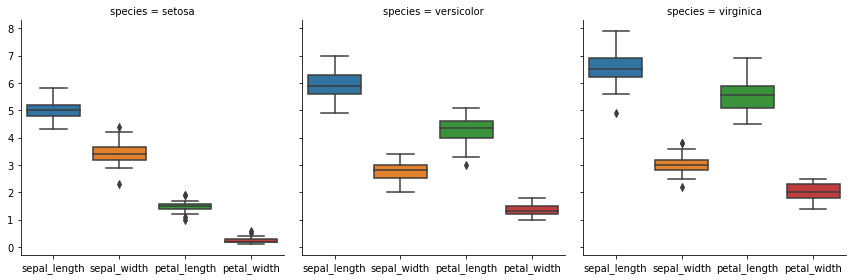

In [20]:
# Plot everything by species
sns.factorplot(data = iris_df,
               col = 'species',
              kind = 'box')
plt.show()

## Bar Plots

Bar plots are important! Here's a "count plot", which shows membership per category:

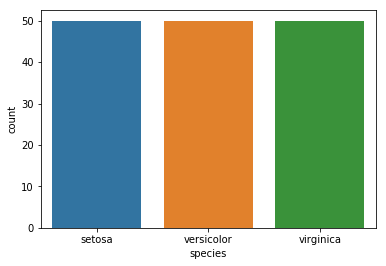

In [21]:
# Make a count plot per class
sns.countplot(data = iris_df, 
              x = "species")
plt.show()

I could also do some sort of facet grid thing here if I wanted to....this is going to be dumb:

## Scatter Plots

Scatter plots are good for showing continuous variables...

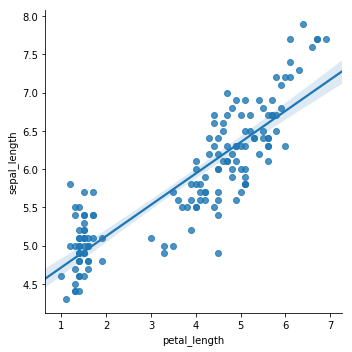

In [22]:
sns.lmplot(data = iris_df, 
           x = 'petal_length',
           y = 'sepal_length'
          )
plt.show()

Can take off the fit + confidence interval if desired...plus I'll color by the species:

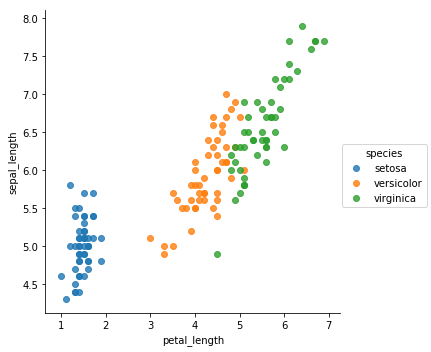

In [23]:
sns.lmplot(data = iris_df, 
           x = 'petal_length',
           y = 'sepal_length',
           hue = 'species',
           fit_reg = False
          )
plt.show()

Or.....make an estimator instead of points at each location

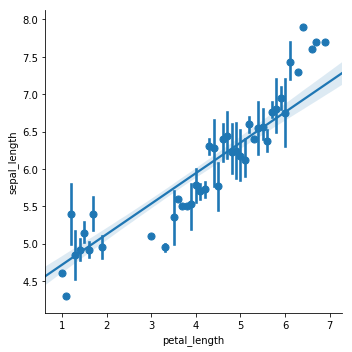

In [24]:
sns.lmplot(data = iris_df, 
           x = 'petal_length',
           y = 'sepal_length',
           x_estimator = np.mean
          )
plt.show()

## Facet Grids

These are good for showing different categories side-by-side rather than with colors on the same plot; you can do them for scatter plots using the factorplot as well:

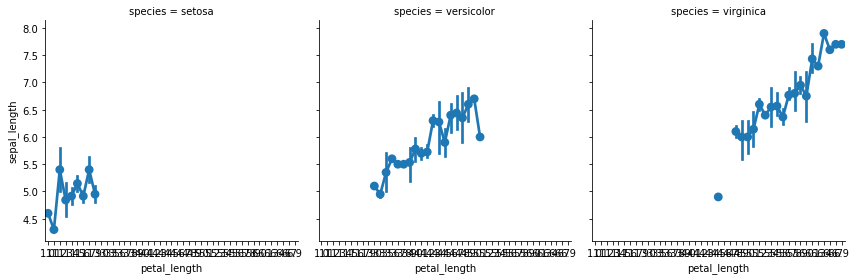

In [25]:
sns.factorplot(data = iris_df,
               x = 'petal_length',
               y = 'sepal_length', 
               col = 'species',
              kind = 'point')
plt.show()

Alternatively, show them on the same plot by specifying "hue" instead of "col":

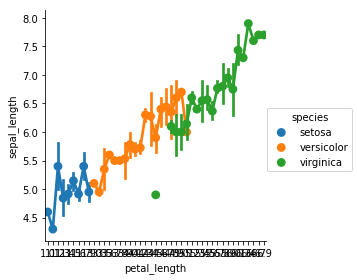

In [26]:
sns.factorplot(data = iris_df,
               x = 'petal_length',
               y = 'sepal_length', 
               hue = 'species',
              kind = 'point')
plt.show()

There's also a `regplot` function:

## More complicated Fits

I'm going to use the Anscombe data to illustrate this...

First, we can fit more complicated things using the 'order' parameter of the fit:

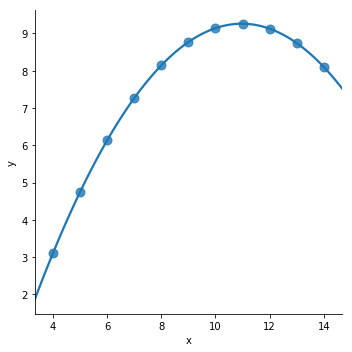

In [27]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});
plt.show()

Note that above:

* Order = 2 makes it a polynomial fit, order 2
* scatter_kws --> I set size to 80
* ci --> Don't print a confidence interval

Next, how to make a fit that's insensitive to outliers:

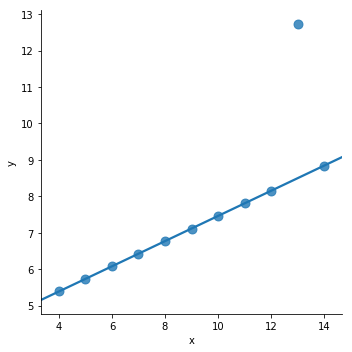

In [28]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});
plt.show()

Here, the "robust = True" is doing the leg work

There's also the ability to fit multiple models using the lowess parameter; I believe this is a spline with knots:

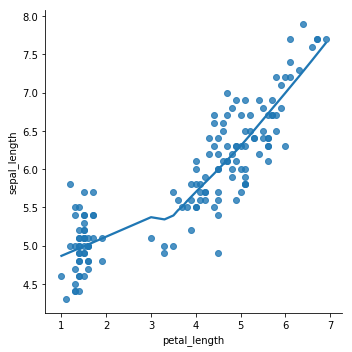

In [29]:
sns.lmplot(data = iris_df, 
           x = 'petal_length',
           y = 'sepal_length',
           lowess = True
          )
plt.show()

Finally, what if there's a binary classification and we want to visualize the logistic regression decision boundary? I'll alter the Iris data to demonstrate this:

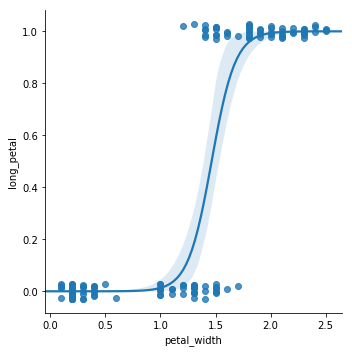

In [30]:
# Make "long_petal" column
iris_df["long_petal"] = iris_df.petal_length > 4.5

# Plot against petal width; uses width as a predictor
sns.lmplot(x="petal_width", y="long_petal", data=iris_df,
           logistic=True, y_jitter=.03);
plt.show()

### Related: Residual plots

If I want to plot my residuals for a given fit, there's residplot. It's useful for finding patterns in the residuals that might have been missed. All it does is fit a simple LM:

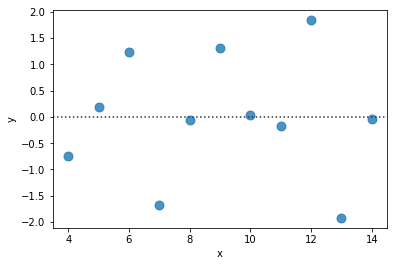

In [31]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});
plt.show()

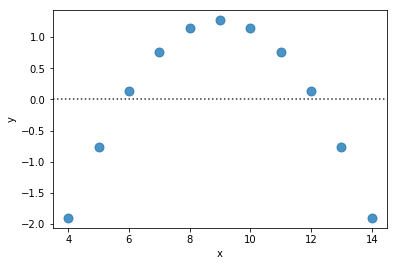

In [32]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});
plt.show()

So this is super useful for cases like the anscombe data

## Heatmaps

This is pretty straightforward; for a data frame, I can calculate correlation coefficients and plot them using the heatmap:

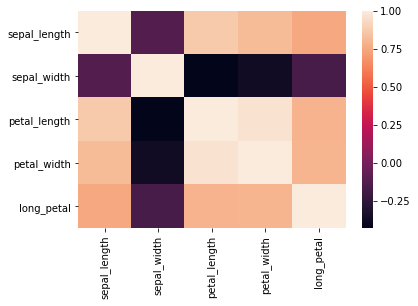

In [33]:
sns.heatmap(iris_df.corr())
plt.show()

Same heatmap, but a different palette (greens):

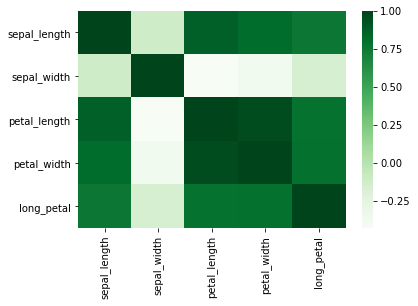

In [34]:
sns.heatmap(iris_df.corr(), 
           cmap = 'Greens')
plt.show()

Or purples...

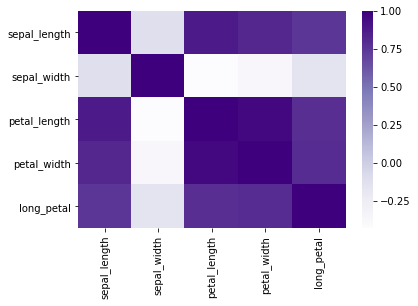

In [35]:
sns.heatmap(iris_df.corr(), 
           cmap = 'Purples')
plt.show()

Or perhaps a diverging palette instead:

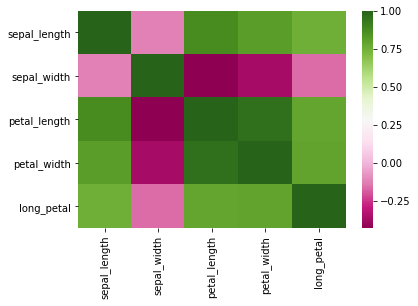

In [36]:
sns.heatmap(iris_df.corr(), 
           cmap = 'PiYG')
plt.show()

### More color palette info here: https://seaborn.pydata.org/tutorial/color_palettes.html